In [3]:
import sys
import glob
import serial


def serial_ports():
    """ Lists serial port names

        :raises EnvironmentError:
            On unsupported or unknown platforms
        :returns:
            A list of the serial ports available on the system
    """
    if sys.platform.startswith('win'):
        ports = ['COM%s' % (i + 1) for i in range(256)]
    elif sys.platform.startswith('linux') or sys.platform.startswith('cygwin'):
        # this excludes your current terminal "/dev/tty"
        ports = glob.glob('/dev/tty[A-Za-z]*')
    elif sys.platform.startswith('darwin'):
        ports = glob.glob('/dev/tty.*')
    else:
        raise EnvironmentError('Unsupported platform')

    result = []
    for port in ports:
        try:
            s = serial.Serial(port)
            s.close()
            result.append(port)
        except (OSError, serial.SerialException):
            pass
    return result


if __name__ == '__main__':
    print(serial_ports())

['COM3', 'COM16']


In [ ]:
from ball import JetBallReadOut
ports = ('COM15','COM16')
readOut= JetBallReadOut(animalName = 'dummy',ports = ports)
import time
# Run for half hour
readOut.getValues()
for i in range(180):
    readOut.getValues()

    time.sleep(0.1)

    if(i%100==0):
        readOut.printValues()

readOut.close()



In [ ]:
from ball import JetBallReadOut
readOut.close()



In [5]:
baudrate = 57600
timeout = 0.005
ports = ('COM15','COM16')
port1,port2 = ports[0],ports[1]

import serial
import struct
# sensors = [serial.Serial(port=port1,baudrate=baudrate, timeout=timeout),
#            serial.Serial(port=port2,baudrate=baudrate, timeout=timeout)]

sensors = [serial.Serial(port=port1,baudrate=baudrate, timeout=timeout),
          serial.Serial(port=port2,baudrate=baudrate, timeout=timeout)]
for s in sensors:
    s.flushInput()



In [ ]:
#for s in sensors:
 #   s.close()

<IPython.core.display.Javascript object>


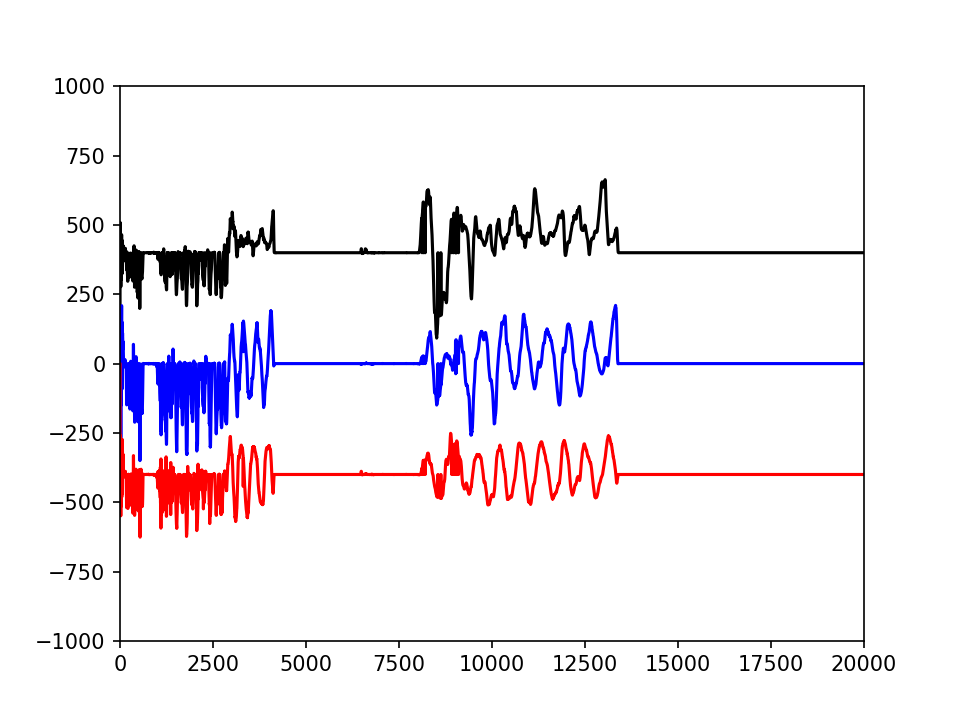

In [15]:
import matplotlib.pyplot as plt
import matplotlib.animation as anim

import numpy as np
import pylab as plt

def correctValue(val):
    if val < 32767:
        return val
    else:
        return -(65536-val)

def readSensor(s):
    cr = s.read()
    if(cr == "X"):
        # We have data
        msg = s.read(5)
        xval =  int(struct.unpack("B", msg[0])[0]) + int(struct.unpack("B", msg[1])[0])*256
        yval = int(struct.unpack("B", msg[3])[0]) + int(struct.unpack("B", msg[4])[0])*256
        return [correctValue(xval),correctValue(yval)]
    return [None,None]


%matplotlib notebook    
xmax = 300
#plt.matplotlib.style.use('ggplot')
fig = plt.figure()
px = plt.plot([0,0],'k')
py = plt.plot([0,0],'b')
pz = plt.plot([0,0],'r')
plt.axis([0,20000,-1000,1000])

cnt = [0]
xpos = [0,0]
ypos = [0,0]

pitch = [0]
yaw = [0]
roll = [0]
import time
expStartTime = time.time()

def getPositionIncrement(sensors):
    for sensor_index,s in enumerate(sensors):
        res = [None,None]
        treceived = long((time.time() - expStartTime))
        if s.inWaiting():   
            res = readSensor(s) 
        if None in res:
            res = [0,0]                
        xpos[sensor_index] = res[0]
        ypos[sensor_index] = res[1]

    yaw = (xpos[0] + xpos[1])/2.
    pitch = (ypos[0] + ypos[1])/2.
    roll = (ypos[0] - ypos[1])/2.
    return time,yaw,pitch,roll

def update(i):
    for sensor_index,s in enumerate(sensors):
        res = [None,None]
        treceived = long((time.time() - expStartTime))
        if s.inWaiting():   
            res = readSensor(s)
            
        
        if None in res:
            res = [0,0]                
        xpos[sensor_index] = res[0]
        ypos[sensor_index] = res[1]

    yaw[0] = (xpos[0] + xpos[1])/2.
    pitch[0] = (ypos[0] + ypos[1])/2.
    roll[0] = (ypos[0] - ypos[1])/2.
 
    cnt[0] += treceived/10.
    px[0].set_ydata(np.hstack([px[0].get_ydata(),yaw[0]+400]))
    px[0].set_xdata(np.hstack([px[0].get_xdata(),cnt[0]]))
    py[0].set_ydata(np.hstack([py[0].get_ydata(),pitch[0]]))
    py[0].set_xdata(np.hstack([py[0].get_xdata(),cnt[0]]))
    pz[0].set_ydata(np.hstack([pz[0].get_ydata(),roll[0]-400]))
    pz[0].set_xdata(np.hstack([pz[0].get_xdata(),cnt[0]]))
    #plt.gca().set_xlim(cnt[0]+np.array([-10,1]))
    return px,py,pz

a = anim.FuncAnimation(fig, update, np.arange(0,20000),interval = 3, repeat=False)


In [ ]:
readSensor(sensors[1])

In [ ]:
a._stop()

In [ ]:
for s in sensors:
    print(s.inWaiting())

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as anim

import numpy as np
import pylab as plt

def correctValue(val):
    if val < 32767:
        return val
    else:
        return -(65536-val)

def readSensor(s):
    cr = s.read()
    if(cr == "X"):
        # We have data
        msg = s.read(5)
        xval =  int(struct.unpack("B", msg[0])[0]) + int(struct.unpack("B", msg[1])[0])*256
        yval = int(struct.unpack("B", msg[3])[0]) + int(struct.unpack("B", msg[4])[0])*256
        return [correctValue(xval),correctValue(yval)]
    return [None,None]


%matplotlib notebook    
xmax = 300
fig = plt.figure()
px = plt.plot([0,0],'k')
py = plt.plot([0,0],'b')
pz = plt.plot([0,0],'r')
plt.axis([0,20000,-8000,8000])

cnt = [0]
xpos = [0,0]
ypos = [0,0]

pitch = [0]
yaw = [0]
roll = [0]

def update(i):

    for s in sensors:
        if s.inWaiting():   
            res = readSensor(s)
            if not None in res:
                xpos[sensors.index(s)] += res[0]
                ypos[sensors.index(s)] += res[1]
                
    yaw[0] = (xpos[0] + xpos[1])/2
    pitch[0] = (ypos[0] + ypos[1])/2
    roll[0] = (ypos[0] - ypos[1])/2
 
    cnt[0] += 1
    px[0].set_ydata(np.hstack([px[0].get_ydata(),yaw[0]+2000]))
    px[0].set_xdata(np.hstack([px[0].get_xdata(),cnt[0]]))
    py[0].set_ydata(np.hstack([py[0].get_ydata(),pitch[0]]))
    py[0].set_xdata(np.hstack([py[0].get_xdata(),cnt[0]]))
    pz[0].set_ydata(np.hstack([pz[0].get_ydata(),roll[0]-2000]))
    pz[0].set_xdata(np.hstack([pz[0].get_xdata(),cnt[0]]))
    
    return px,py,pz

a = anim.FuncAnimation(fig, update, np.arange(0,10000),interval = 1, repeat=False)


In [ ]:
a._stop()